In [1]:
# https://medium.com/datadriveninvestor/linear-regression-using-tensorflow-estimator-9aa570914375

In [2]:
import os
import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing

%matplotlib inline

In [3]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../data")
df = pd.read_csv(os.path.join(output_dir, "combined_sentimentanalysis.csv"))
df_test = pd.read_csv(os.path.join(output_dir, "combined_sentimentanalysistest.csv"))
#df_test = pd.read_csv(os.path.join(output_dir, "figlet1599056546.006096_1599063766.431225.csv"))
df = df.drop(df[df.responsetime > 2].index)
df.pop('Time')
df_test = df_test.drop(df_test[df_test.responsetime > 2].index)
df_test.pop('Time')
df.head()

,cpu,diskio,diskioRead,diskioWritten,mem,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization
0,7.452470,0.000129,0.000000,1.484572e+04,0.006211,7.686411e+02,690.618472,1.0,7.0,0.427801,12.0,76.330988,5.045532e+10,10.168922
1,6.314931,0.056578,903.680000,7.635895e+06,0.006211,4.423151e+06,44196.825694,1.0,42.0,0.441701,12.0,76.330988,5.045532e+10,10.168922
2,9.499113,0.073244,1001.244444,9.543407e+06,0.006211,4.011359e+06,41064.000000,1.0,76.0,0.429230,12.0,13.216667,5.045532e+10,10.329697
3,6.085528,0.073156,1001.244444,9.533212e+06,0.026095,4.012145e+06,42053.311111,1.0,112.0,0.421655,12.0,13.216667,5.045532e+10,10.329697
4,9.452724,0.021956,182.044444,2.628813e+06,0.119376,3.909378e+03,3469.288889,1.0,140.0,0.439443,12.0,14.213889,5.045532e+10,10.159327


In [4]:
df_t = pd.DataFrame()
df_ttest = pd.DataFrame()

In [5]:
df_t['total_cpu_util'] = (df['totalcpuUtilization']*df['totalcpu'])/100
df_t['total_mem_util'] = (df['totalmemoryUtilization']*df['totalmemory'])*1e-9
df_t['responsetime'] = df['responsetime']
df_t['requests'] = df['requests']
df_t['replica'] = df['replica']
df_ttest['total_cpu_util'] = (df_test['totalcpuUtilization']*df_test['totalcpu'])/100
df_ttest['total_mem_util'] = (df_test['totalmemoryUtilization']*df_test['totalmemory'])*1e-9
df_ttest['responsetime'] = df_test['responsetime']
df_ttest['requests'] = df_test['requests']
df_ttest['replica'] = df_test['replica']
df_t.head()

,total_cpu_util,total_mem_util,responsetime,requests,replica
0,9.159719,513.076211,0.427801,7.0,1.0
1,9.159719,513.076211,0.441701,42.0,1.0
2,1.586000,521.188136,0.429230,76.0,1.0
3,1.586000,521.188136,0.421655,112.0,1.0
4,1.705667,512.592066,0.439443,140.0,1.0


In [6]:
muthu = df_t
X = muthu.loc[:,['total_cpu_util','total_mem_util','replica', 'requests']].values
X = preprocessing.normalize(X, norm='max')
y = muthu.loc[:,['responsetime']].values
kf = KFold(n_splits=7, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, '\n', y_train)
    print(X_test, '\n', y_test)

TRAIN: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  32  33  34  35  36  37  38  40
  41  42  43  45  46  47  48  50  51  52  53  56  57  58  59  61  62  64
  66  67  68  71  73  74  75  79  80  82  83  84  85  86  87  88  89  91
  92  93  94  95  96  97  98  99 100 102 103 104 105 106 107 108 110 111
 112 113 114 115 116 117 119 121 122 123 124 125 126 127 128 129 130 134
 137 138 139 140 141 142 143 144 146 147 148 149 150 151 152 153 154 156
 157 158 159 160 161 162 163 164 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 211 214 215
 216 217 219 220 221 222 223 224 225 226 227 228 229 230 232 233 234 235
 236 237 238 239 240 241 242 243 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 261 262 263 266 267 268 269 270 271 272 273 274 275
 276 278 279 280 281 282 283 284 285 286 287

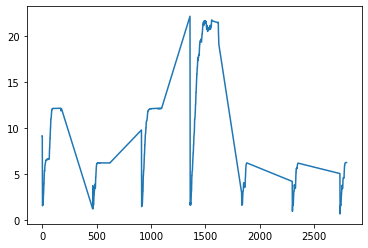

In [7]:
plt.plot(df_t['total_cpu_util'])

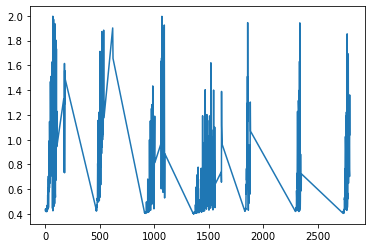

In [8]:
plt.plot(df_t['responsetime'])

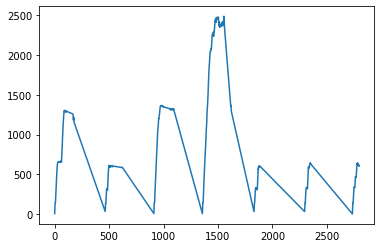

In [9]:
plt.plot(df_t['requests'])

In [10]:
n = len(df_t)
train_df = df_t[0:int(n*0.8)]
eval_df = df_t[int(n*0.8):]
test_df = df_ttest[:]

#train_mean = train_df.mean()
#print(train_mean)
#train_std = train_df.std()
#print(train_std)

#train_df = (train_df - train_mean) / train_std
#test_df = (test_df - train_mean) / train_std
#train_df

In [11]:
#import seaborn as sns
#df_std = (df_t - train_mean) / train_std
##print(df_std)
#df_std = df_std.melt(var_name='Column', value_name='Normalized')
##print(df_std)
#plt.figure(figsize=(12, 6))
#ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
#_ = ax.set_xticklabels(df_t.keys(), rotation=90)

In [12]:
from sklearn import preprocessing
df_new = df.drop(['cpu','mem','totalmemory','diskio', 'diskioRead', 'diskioWritten', 'networkReceived', 'networkTransmitted', 'totalcpuUtilization', 'totalmemoryUtilization'], axis=1)
x_train = train_df[[col for col in train_df.columns if col != 'responsetime']]
y_train = train_df['responsetime']
x_val = eval_df[[col for col in eval_df.columns if col != 'responsetime']]
y_val = eval_df['responsetime']
x_test = test_df[[col for col in eval_df.columns if col != 'responsetime']]
y_test = test_df['responsetime']

In [13]:
#x_data.describe(include='all')

In [14]:
#x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3)

In [15]:
feature_col = [tf.feature_column.numeric_column(col) for col in x_train.columns]

In [16]:
opti = tf.optimizers.Adam(learning_rate = 0.01)

In [17]:
input_func= tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train, 
                                                y= y_train, 
                                                batch_size=100, 
                                                num_epochs=1000, 
                                                shuffle=False)

In [18]:
test_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x= x_test,                                                   
                                                 batch_size=10, 
                                                 num_epochs=1, 
                                                 shuffle=False)
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_val,
                                                      y=y_val, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

In [19]:
estimator = tf.estimator.DNNRegressor(hidden_units=[4,4,1], feature_columns=feature_col, optimizer=opti)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpkazfdf_d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [20]:
estimator.train(input_fn=input_func,steps=10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op

INFO:tensorflow:loss = 0.074208334, step = 4200 (0.447 sec)
INFO:tensorflow:global_step/sec: 281.774
INFO:tensorflow:loss = 0.21225522, step = 4300 (0.357 sec)
INFO:tensorflow:global_step/sec: 216.986
INFO:tensorflow:loss = 0.14565429, step = 4400 (0.458 sec)
INFO:tensorflow:global_step/sec: 299.486
INFO:tensorflow:loss = 0.0651806, step = 4500 (0.341 sec)
INFO:tensorflow:global_step/sec: 272.96
INFO:tensorflow:loss = 0.13326548, step = 4600 (0.367 sec)
INFO:tensorflow:global_step/sec: 274.371
INFO:tensorflow:loss = 0.17906034, step = 4700 (0.363 sec)
INFO:tensorflow:global_step/sec: 253.241
INFO:tensorflow:loss = 0.16053316, step = 4800 (0.393 sec)
INFO:tensorflow:global_step/sec: 305.562
INFO:tensorflow:loss = 0.069274, step = 4900 (0.326 sec)
INFO:tensorflow:global_step/sec: 261.314
INFO:tensorflow:loss = 0.22044875, step = 5000 (0.381 sec)
INFO:tensorflow:global_step/sec: 336.236
INFO:tensorflow:loss = 0.11139008, step = 5100 (0.297 sec)
INFO:tensorflow:global_step/sec: 385.364
INF

In [21]:
result_eval = estimator.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-08T11:49:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpkazfdf_d/model.ckpt-5470
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.20410s
INFO:tensorflow:Finished evaluation at 2020-10-08-11:49:48
INFO:tensorflow:Saving dict for global step 5470: average_loss = 0.11173858, gl

In [22]:
result_eval

{'average_loss': 0.11173858,
 'label/mean': 0.7297068,
 'loss': 0.111186445,
 'prediction/mean': 0.7341454,
 'global_step': 5470}

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpkazfdf_d/model.ckpt-5470
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Text(0, 0.5, 'predicted values')

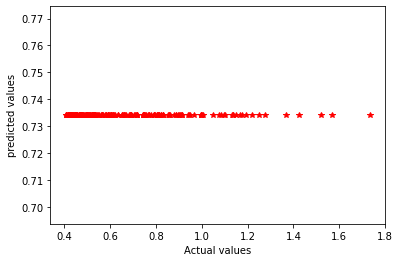

In [23]:
predictions=[]
for pred in estimator.predict(input_fn=test_input_func):
    predictions.append(np.array(pred['predictions']).astype(float))
plt.plot(y_test, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')

In [24]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, predictions))**0.5

0.5123165401017665

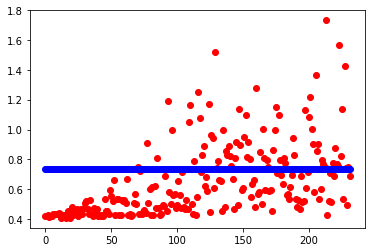

In [25]:
plt.scatter(range(0,len(y_test)),y_test, color='red')
plt.scatter(range(0,len(predictions)),predictions, color='blue')

In [26]:
from sklearn.metrics import r2_score
R = r2_score(y_test, predictions)
print ('R² :',R)

R² : -0.1222887583558443


In [27]:
print(y_test,predictions )

0      0.421643
1      0.421552
2      0.426619
3      0.412297
4      0.417079
         ...   
228    1.426071
229    0.744534
230    0.494612
231    0.746159
232    0.690581
Name: responsetime, Length: 232, dtype: float64 [array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546]), array([0.73414546])

# Kfold - data split